In [ ]:
!pip install tensorflow==2.11.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.2/439.2 kB 30.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 35.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 25.3 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.15.0
    Uninstalling tensorflow-estimator-2.15.0:
      Successfully uninstalled tensorflow-estimator-2.15.0
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.2
    Uninstalling tensorboard-data-server-0.7.2:
      Successfully uninstalled tensorboard-data-server-0.7.2
  Att

In [ ]:
! pip install git+https://github.com/VenkateshwaranB/stellargraph.git

  Cloning https://github.com/VenkateshwaranB/stellargraph.git to /tmp/pip-req-build-20zcq3d6
  Running command git clone --filter=blob:none --quiet https://github.com/VenkateshwaranB/stellargraph.git /tmp/pip-req-build-20zcq3d6
  Resolved https://github.com/VenkateshwaranB/stellargraph.git to commit efa1f847109a4ba490e7a5105646a20ee09a3243
  Preparing metadata (setup.py) ... done
  Created wheel for stellargraph: filename=stellargraph-1.3.0b0-py3-none-any.whl size=431845 sha256=b247978dbb412a9efecba3febc961611b931f8f070091d899bfc475c807f2a48
  Stored in directory: /tmp/pip-ephem-wheel-cache-cdatv_yk/wheels/f3/06/0f/089f69af27d308a1830638f855b6c5755311d8ffc451de9980
Successfully built stellargraph


In [ ]:
import json
import pandas as pd
import numpy as np
from sklearn import preprocessing, feature_extraction, model_selection
from sklearn.metrics import mean_absolute_error, mean_squared_error

import stellargraph as sg
from stellargraph.mapper import HinSAGELinkGenerator
from stellargraph.layer import HinSAGE, link_regression
from tensorflow.keras import Model, optimizers, losses, metrics

import multiprocessing
from stellargraph import datasets
from IPython.display import display, HTML
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
! gdown 1K6sW6fNAjay7q4dhT_D4De7vzNTq6xZ8

Downloading...
From (original): https://drive.google.com/uc?id=1K6sW6fNAjay7q4dhT_D4De7vzNTq6xZ8
From (redirected): https://drive.google.com/uc?id=1K6sW6fNAjay7q4dhT_D4De7vzNTq6xZ8&confirm=t&uuid=5f4a7e87-ab5d-4667-8db2-a8b60de45345
To: /content/ThirtyMusic.tar.gz
100% 1.01G/1.01G [00:22<00:00, 45.0MB/s]


In [ ]:
! tar -xvf ThirtyMusic.tar.gz
"""
entities/
entities/users.idomaar
entities/playlist.idomaar
entities/tracks.idomaar
entities/tags.idomaar
entities/persons.idomaar
entities/albums.idomaar
relations/
relations/events.idomaar
relations/sessions.idomaar
relations/love.idomaar
"""

entities/
entities/users.idomaar
entities/playlist.idomaar
entities/tracks.idomaar
entities/tags.idomaar
entities/persons.idomaar
entities/albums.idomaar
relations/
relations/events.idomaar
relations/sessions.idomaar
relations/love.idomaar


'\nentities/\nentities/users.idomaar\nentities/playlist.idomaar\nentities/tracks.idomaar\nentities/tags.idomaar\nentities/persons.idomaar\nentities/albums.idomaar\nrelations/\nrelations/events.idomaar\nrelations/sessions.idomaar\nrelations/love.idomaar\n'

In [ ]:
from tqdm import tqdm

# Parse the play data
users = set()
tracks = set()
max_edges = 1000

user_degree = {}
track_degree = {}

with open('play_data.txt', 'w') as f:
    with open('relations/sessions.idomaar', 'r') as play_file:
        lines = play_file.readlines()
        for line in tqdm(lines):

            if not line.startswith('#'):

                parts = line.split()
                #print(parts) # ['event.session', '287144', '1390231051', '{"numtracks":23,"playtime":4547} {"subjects":[{"type":"user","id":44361}],"objects":[{"type":"track","id":4698874,"playstart":0,"playtime":58,"playratio":null,"action":"play"},{"type":"track","id":838286,"playstart":58,"playtime":310,"playratio":1.01,"action":"play"},{"type":"track","id":2588097,"playstart":368,"playtime":179,"playratio":1.01,"action":"play"},{"type":"track","id":2746740,"playstart":547,"playtime":342,"playratio":1.44,"action":"play"},{"type":"track","id":3873988,"playstart":889,"playtime":259,"playratio":1.01,"action":"play"},{"type":"track","id":808046,"playstart":1148,"playtime":236,"playratio":1.01,"action":"play"},{"type":"track","id":2588498,"playstart":1384,"playtime":158,"playratio":1.01,"action":"play"},{"type":"track","id":2492893,"playstart":1542,"playtime":196,"playratio":1.02,"action":"play"},{"type":"track","id":2168413,"playstart":1738,"playtime":165,"playratio":1.02,"action":"play"},{"type":"track","id":1778345,"playstart":1903,"playtime":448,"playratio":1.07,"action":"play"},{"type":"track","id":2989691,"playstart":2351,"playtime":194,"playratio":0.99,"action":"play"},{"type":"track","id":4698875,"playstart":2545,"playtime":256,"playratio":null,"action":"play"},{"type":"track","id":2985955,"playstart":2801,"playtime":257,"playratio":1.54,"action":"play"},{"type":"track","id":4698876,"playstart":3058,"playtime":177,"playratio":null,"action":"play"},{"type":"track","id":1728736,"playstart":3235,"playtime":270,"playratio":0.96,"action":"play"},{"type":"track","id":2615446,"playstart":3505,"playtime":172,"playratio":0.93,"action":"play"},{"type":"track","id":4698877,"playstart":3677,"playtime":177,"playratio":null,"action":"play"},{"type":"track","id":4698878,"playstart":3854,"playtime":144,"playratio":null,"action":"play"},{"type":"track","id":515524,"playstart":3998,"playtime":134,"playratio":1.10,"action":"play"},{"type":"track","id":4698879,"playstart":4132,"playtime":172,"playratio":null,"action":"play"},{"type":"track","id":4698880,"playstart":4304,"playtime":98,"playratio":null,"action":"play"},{"type":"track","id":2444241,"playstart":4402,"playtime":146,"playratio":1.04,"action":"play"},{"type":"track","id":4698881,"playstart":4548,"playtime":-1,"playratio":1.00,"action":null}]}']


                #f.write(f"u_{user_id} t_{track_id} {play_count}\n")
                data = json.loads(parts[3])
                play_count = data['numtracks']
                if play_count > 60:
                    continue
                data2 = json.loads(parts[4])
                user_id = data2['subjects'][0]['id']
                objects = data2['objects']

                for track in objects:
                    track_id = track['id']
                    users.add(user_id)
                    tracks.add(track_id)

                    user_degree[user_id] = user_degree.get(user_id, 0) + 1
                    track_degree[track_id] = track_degree.get(track_id, 0) + 1

                    # f.write(f"u_{user_id} t_{track_id} {play_count}\n")
                    f.write(f"{user_id} {track_id} {play_count}\n")
                max_edges -= 1
                if max_edges <= 0:
                    break

  0%|          | 1023/2764474 [00:00<02:47, 16513.20it/s]


In [ ]:
# max min and average of user degree
print(min(user_degree.values()), max(user_degree.values()), sum(user_degree.values())/len(user_degree))

1 203 33.601476014760145


In [ ]:
with open('play_data.txt') as f:
    for line in f.readlines()[:5]:
        print(line.strip())

44361 4698874 23
44361 838286 23
44361 2588097 23
44361 2746740 23
44361 3873988 23


In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
from stellargraph import StellarGraph

# Load the data from the file
edges_with_play_count = pd.read_table("play_data.txt", header=None, names=["user_id", "track_id", "play_count"], sep=" ")


In [ ]:
edges_with_play_count.play_count.describe()

count    9106.000000
mean       19.768065
std        13.773320
min         1.000000
25%         9.000000
50%        17.000000
75%        29.000000
max        59.000000
Name: play_count, dtype: float64

In [ ]:
len(edges_with_play_count['track_id'].unique())/len(edges_with_play_count['user_id'].unique())

26.39852398523985

In [ ]:
# sort degrees and show top 10
user_degrees = sorted(user_degree.items(), key=lambda x: x[1], reverse=True)
track_degrees = sorted(track_degree.items(), key=lambda x: x[1], reverse=True)

print("Top 10 users by degree:")
for user_id, degree in user_degrees[:10]:
    print(f"User ID: {user_id}, Degree: {degree}")

Top 10 users by degree:
User ID: 4882, Degree: 203
User ID: 7582, Degree: 184
User ID: 28726, Degree: 182
User ID: 3612, Degree: 180
User ID: 42105, Degree: 158
User ID: 43851, Degree: 147
User ID: 39354, Degree: 143
User ID: 23303, Degree: 139
User ID: 11597, Degree: 138
User ID: 7122, Degree: 136


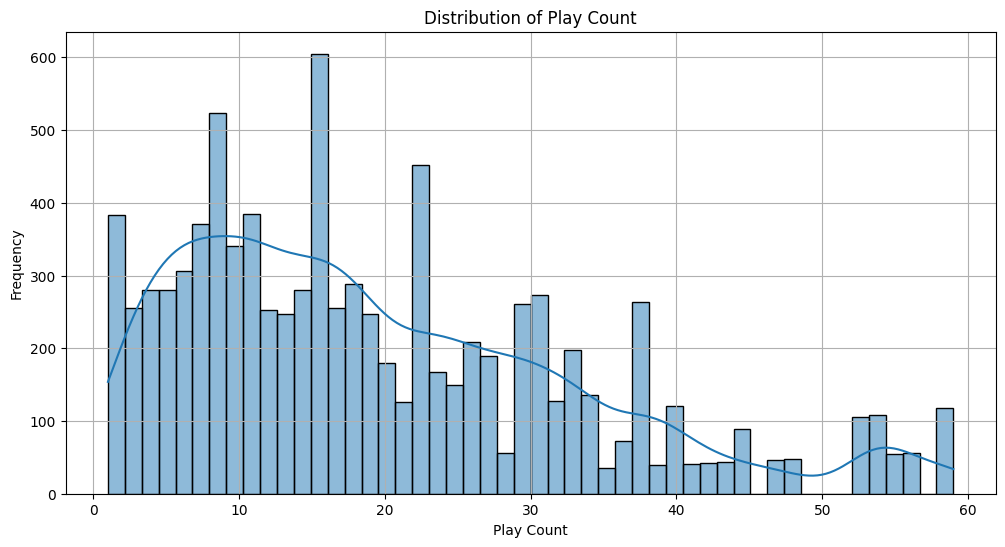

In [ ]:
import seaborn as sns

# Plotting the distribution of play counts
plt.figure(figsize=(12, 6))
sns.histplot(edges_with_play_count['play_count'], bins=50, kde=True)
plt.title('Distribution of Play Count')
plt.xlabel('Play Count')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

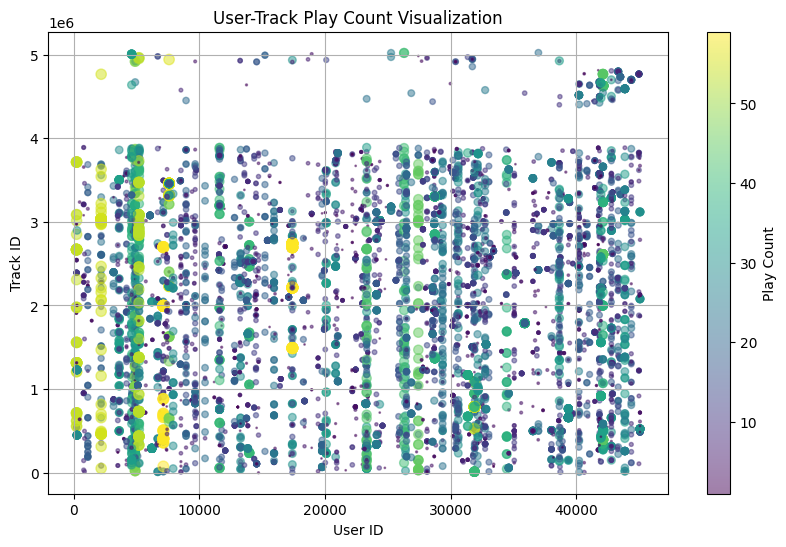

In [ ]:
import matplotlib.pyplot as plt

# Créer un graphique de dispersion
plt.figure(figsize=(10, 6))
scatter = plt.scatter(edges_with_play_count["user_id"], edges_with_play_count["track_id"],
                      s=edges_with_play_count["play_count"], alpha=0.5, c=edges_with_play_count["play_count"], cmap='viridis')

# Ajouter une barre de couleur pour indiquer la valeur du play_count
plt.colorbar(scatter, label='Play Count')

# Étiquettes et titre du graphique
plt.xlabel('User ID')
plt.ylabel('Track ID')
plt.title('User-Track Play Count Visualization')
plt.grid(True)
# Save the plot as a PNG file
plt.savefig('user_track_play_count_visualization.png')
plt.show()

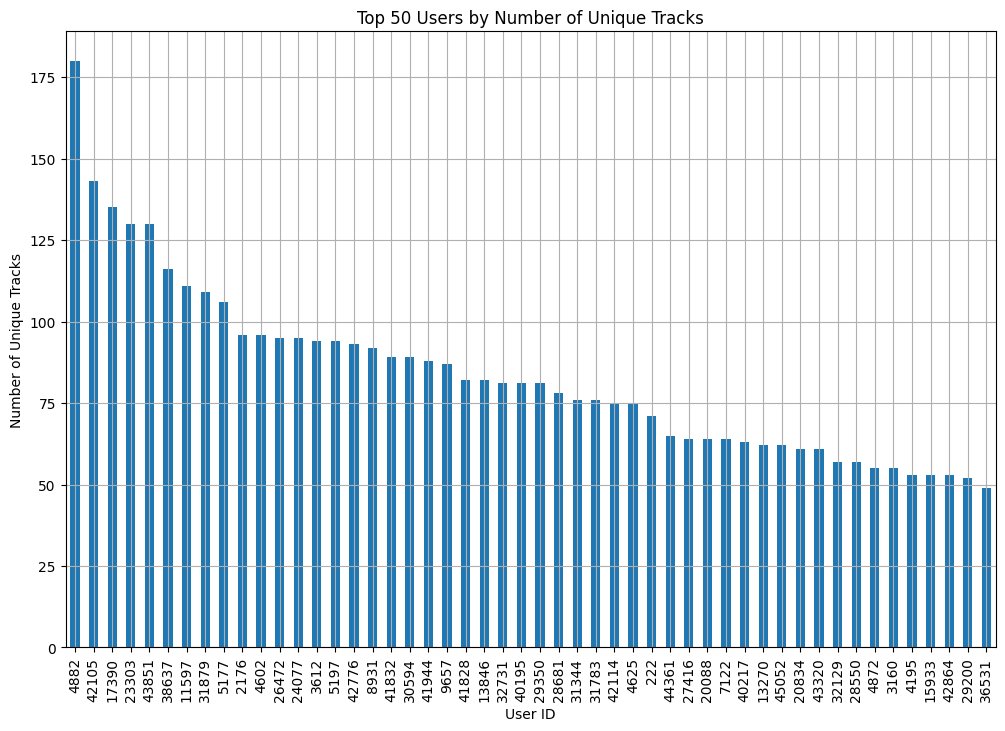

In [ ]:
# Group by user_id and count the number of unique tracks for each user
user_track_counts = edges_with_play_count.groupby("user_id")["track_id"].nunique()

# Sort the user_track_counts for better visualization
user_track_counts = user_track_counts.sort_values(ascending=False)

# Sort the user_track_counts in descending order
user_track_counts = user_track_counts.sort_values(ascending=False)

# Select the top 50 users
top_50_user_track_counts = user_track_counts.head(50)
# Create a bar chart
plt.figure(figsize=(12, 8))
top_50_user_track_counts.plot(kind='bar')

# Add labels and title
plt.xlabel('User ID')
plt.ylabel('Number of Unique Tracks')
plt.title('Top 50 Users by Number of Unique Tracks')
# Save the plot as a PNG file
plt.savefig('Top_50_users_by_numberofUnique_tracks_visualization.png')
plt.grid(True)

In [ ]:

# # Create a NetworkX graph
# G = nx.Graph()

# # Add nodes for users and tracks with random feature vectors
# users = edges_with_play_count['user_id'].unique()
# tracks = edges_with_play_count['track_id'].unique()

# # Assuming feature vectors of length 3 for simplicity
# for user in users:
#     G.add_node(user, label='user', features=np.random.rand(20))

# for track in tracks:
#     G.add_node(track, label='track', features=np.random.rand(20))

# # Add edges with play counts as the rating
# for _, row in edges_with_play_count.iterrows():
#     G.add_edge(row['user_id'], row['track_id'], play_count=row['play_count'])

# # Convert the NetworkX graph to a StellarGraph
# stellar_graph = StellarGraph.from_networkx(
#     G,
#     node_features="features"
# )

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Load the data from the file
edges_with_play_count = pd.read_table("play_data.txt", header=None, names=["user_id", "track_id", "play_count"], sep=" ")

# Initialize the graph
G = nx.Graph()

# Add user and track nodes with labels and features
user_nodes = edges_with_play_count['user_id'].unique()
track_nodes = edges_with_play_count['track_id'].unique()

# Assuming feature vectors of length 20 for simplicity
user_features = {user: np.random.rand(20) for user in user_nodes}
track_features = {track: np.random.rand(20) for track in track_nodes}

# Add nodes with labels and features
for user in user_nodes:
    G.add_node(user, label='user', features=user_features[user])

for track in track_nodes:
    G.add_node(track, label='track', features=track_features[track])

# Add edges between users and tracks
for index, row in edges_with_play_count.iterrows():
    G.add_edge(row['user_id'], row['track_id'], weight=row['play_count'])

# Check the nodes and edges
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

# Convert the NetworkX graph to a StellarGraph
stellar_graph = StellarGraph.from_networkx(
    G,
    node_features="features"
)


Number of nodes: 7425
Number of edges: 7338


In [ ]:
# Calculate the number of unique tracks for each user
user_track_counts = edges_with_play_count.groupby("user_id")["track_id"].nunique()

# Sort the user_track_counts in descending order
user_track_counts = user_track_counts.sort_values(ascending=False)

# Select the top 50 users
top_50_users = user_track_counts.head(50).index

# Create a subgraph with only the top 50 users and their interactions
top_50_edges = edges_with_play_count[edges_with_play_count['user_id'].isin(top_50_users)]

# # Create the graph from the top 50 edges
# G_top_50 = nx.Graph()

# # Add nodes and edges for the top 50 users and their tracks
# for _, row in top_50_edges.iterrows():
#     G_top_50.add_node(row['user_id'], label='user', features=user_features[row['user_id']])
#     G_top_50.add_node(row['track_id'], label='track', features=track_features[row['track_id']])
#     G_top_50.add_edge(row['user_id'], row['track_id'], weight=row['play_count'])

# # Draw the graph
# plt.figure(figsize=(12, 12))

# # Position the nodes using spring layout
# pos = nx.spring_layout(G_top_50, k=0.15, iterations=20)

# # Draw the nodes
# user_nodes = [n for n, d in G_top_50.nodes(data=True) if d['label'] == 'user']
# track_nodes = [n for n, d in G_top_50.nodes(data=True) if d['label'] == 'track']

# nx.draw_networkx_nodes(G_top_50, pos, nodelist=user_nodes, node_color='blue', node_size=50, alpha=0.8, label='Users')
# nx.draw_networkx_nodes(G_top_50, pos, nodelist=track_nodes, node_color='green', node_size=50, alpha=0.8, label='Tracks')

# # Draw the edges
# nx.draw_networkx_edges(G_top_50, pos, edgelist=G_top_50.edges(), width=0.5, alpha=0.5)

# # Draw labels (optional)
# nx.draw_networkx_labels(G_top_50, pos, font_size=8, font_color='black')

# # Add legend
# plt.legend(scatterpoints=1, loc='best', fontsize=10)

# # Title and show the plot
# plt.title('Top 50 Users - User-Track Interaction Network')
# # Save the plot as a PNG file
# plt.savefig('top50_users_track_interaction_network_visualization.png')
# plt.show()

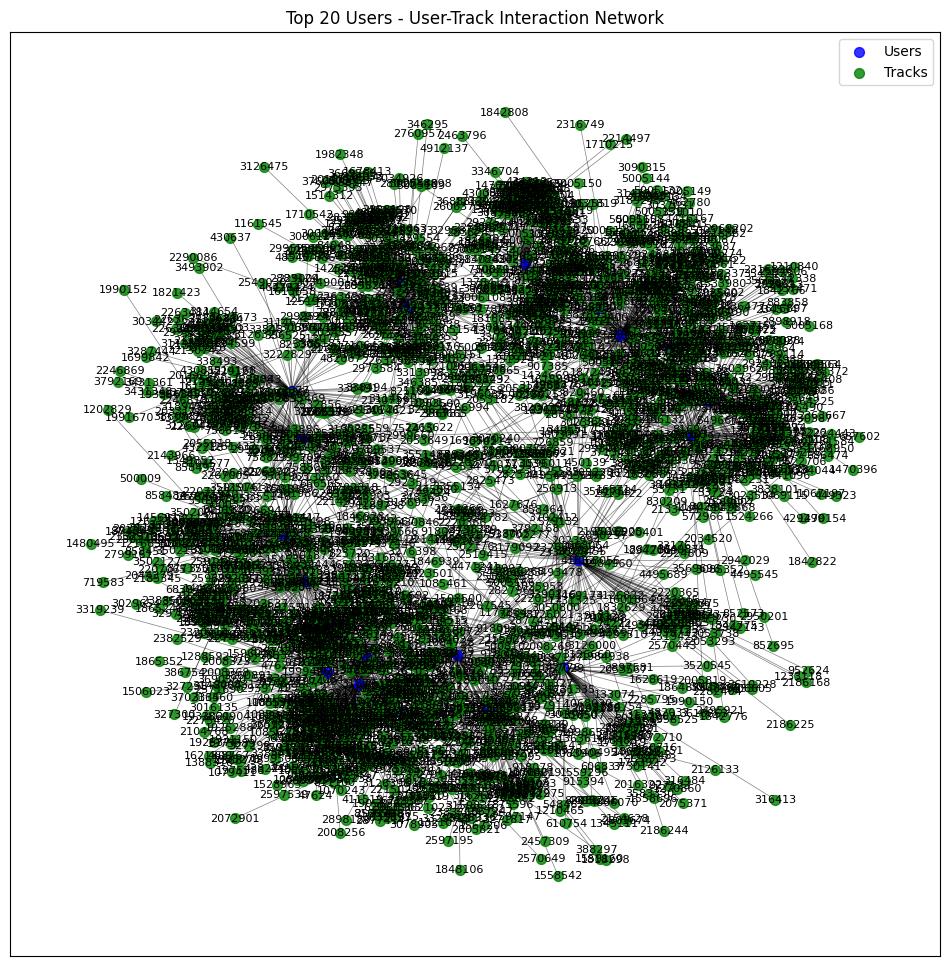

In [ ]:
# Calculate the number of unique tracks for each user
user_track_counts = edges_with_play_count.groupby("user_id")["track_id"].nunique()

# Sort the user_track_counts in descending order
user_track_counts = user_track_counts.sort_values(ascending=False)

# Select the top 20 users
top_20_users = user_track_counts.head(20).index

# Create a subgraph with only the top 20 users and their interactions
top_20_edges = edges_with_play_count[edges_with_play_count['user_id'].isin(top_20_users)]

# Create the graph from the top 20 edges
G_top_20 = nx.Graph()

# Add nodes and edges for the top 50 users and their tracks
for _, row in top_20_edges.iterrows():
    G_top_20.add_node(row['user_id'], label='user', features=user_features[row['user_id']])
    G_top_20.add_node(row['track_id'], label='track', features=track_features[row['track_id']])
    G_top_20.add_edge(row['user_id'], row['track_id'], weight=row['play_count'])

# Draw the graph
plt.figure(figsize=(12, 12))

# Position the nodes using spring layout
pos = nx.spring_layout(G_top_20, k=0.15, iterations=20)

# Draw the nodes
user_nodes = [n for n, d in G_top_20.nodes(data=True) if d['label'] == 'user']
track_nodes = [n for n, d in G_top_20.nodes(data=True) if d['label'] == 'track']

nx.draw_networkx_nodes(G_top_20, pos, nodelist=user_nodes, node_color='blue', node_size=50, alpha=0.8, label='Users')
nx.draw_networkx_nodes(G_top_20, pos, nodelist=track_nodes, node_color='green', node_size=50, alpha=0.8, label='Tracks')

# Draw the edges
nx.draw_networkx_edges(G_top_20, pos, edgelist=G_top_20.edges(), width=0.5, alpha=0.5)

# Draw labels (optional)
nx.draw_networkx_labels(G_top_20, pos, font_size=8, font_color='black')

# Add legend
plt.legend(scatterpoints=1, loc='best', fontsize=10)

# Title and show the plot
plt.title('Top 20 Users - User-Track Interaction Network')
# Save the plot as a PNG file
#plt.savefig('top20_users_track_interaction_network_visualization.png')
plt.show()

In [ ]:

# Draw the graph
plt.figure(figsize=(12, 12))

# Position the nodes using bipartite layout
pos = nx.spring_layout(G, k=0.15, iterations=20)

# Draw the nodes
user_nodes = [n for n, d in G.nodes(data=True) if d['label'] == 'user']
track_nodes = [n for n, d in G.nodes(data=True) if d['label'] == 'track']

nx.draw_networkx_nodes(G, pos, nodelist=user_nodes, node_color='blue', node_size=50, alpha=0.8, label='Users')
nx.draw_networkx_nodes(G, pos, nodelist=track_nodes, node_color='green', node_size=50, alpha=0.8, label='Tracks')

# Draw the edges
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), width=0.5, alpha=0.5)

# Draw labels
nx.draw_networkx_labels(G, pos, font_size=8, font_color='black')

# Add legend
plt.legend(scatterpoints=1, loc='best', fontsize=10)

# Title and show the plot
plt.title('User-Track Interaction Network')
plt.show()

In [ ]:
print(stellar_graph.info())

StellarGraph: Undirected multigraph
 Nodes: 7425, Edges: 7338

 Node types:
  track: [7154]
    Features: float32 vector, length 20
    Edge types: track-default->user
  user: [271]
    Features: float32 vector, length 20
    Edge types: user-default->track

 Edge types:
    track-default->user: [7338]
        Weights: range=[1, 59], mean=19.1987, std=13.5866
        Features: none


In [ ]:
batch_size = 200
epochs = 300
# Use 70% of edges for training, the rest for testing:
train_size = 0.8
test_size = 0.2

In [ ]:
edges_train, edges_test = model_selection.train_test_split(
    edges_with_play_count, train_size=train_size, test_size=test_size
)

edgelist_train = list(edges_train[["user_id", "track_id"]].itertuples(index=False))
edgelist_test = list(edges_test[["user_id", "track_id"]].itertuples(index=False))

labels_train = edges_train["play_count"]
labels_test = edges_test["play_count"]

In [ ]:
num_samples = [8, 4]

In [ ]:
# Extract user and track node IDs from the StellarGraph object
user_ids = set(stellar_graph.nodes(node_type="user"))
track_ids = set(stellar_graph.nodes(node_type="track"))

# Filter edges to ensure they are valid
valid_edges_train = edges_train[edges_train["user_id"].isin(user_ids) & edges_train["track_id"].isin(track_ids)]
valid_edges_test = edges_test[edges_test["user_id"].isin(user_ids) & edges_test["track_id"].isin(track_ids)]

# Create edge lists again with valid edges
edgelist_train = list(valid_edges_train[["user_id", "track_id"]].itertuples(index=False))
edgelist_test = list(valid_edges_test[["user_id", "track_id"]].itertuples(index=False))

# Update labels accordingly
labels_train = valid_edges_train["play_count"]
labels_test = valid_edges_test["play_count"]

In [ ]:
generator = HinSAGELinkGenerator(
    stellar_graph, batch_size, num_samples, head_node_types=["user", "track"]
)
train_gen = generator.flow(edgelist_train, labels_train, shuffle=True)
test_gen = generator.flow(edgelist_test, labels_test)

In [ ]:
generator.schema.type_adjacency_list(generator.head_node_types, len(num_samples))

[('user', [2]),
 ('track', [3]),
 ('track', [4]),
 ('user', [5]),
 ('user', []),
 ('track', [])]

In [ ]:
generator.schema.schema

{'user': [EdgeType(n1='user', rel='default', n2='track')],
 'track': [EdgeType(n1='track', rel='default', n2='user')]}

In [ ]:
hinsage_layer_sizes = [32, 32]
assert len(hinsage_layer_sizes) == len(num_samples)

hinsage = HinSAGE(
    layer_sizes=hinsage_layer_sizes, generator=generator, bias=True, dropout=0.0
)

In [ ]:
# Expose input and output sockets of hinsage:
x_inp, x_out = hinsage.in_out_tensors()

/usr/local/lib/python3.10/dist-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


In [ ]:
# Final estimator layer
score_prediction = link_regression(edge_embedding_method="concat")(x_out)

link_regression: using 'concat' method to combine node embeddings into edge embeddings


In [ ]:
import tensorflow.keras.backend as K


def root_mean_square_error(s_true, s_pred):
    return K.sqrt(K.mean(K.pow(s_true - s_pred, 2)))


model = Model(inputs=x_inp, outputs=score_prediction)
model.compile(
    optimizer=optimizers.Adam(learning_rate=1e-2),
    loss=losses.mean_squared_error,
    metrics=[root_mean_square_error, metrics.mae],
)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 8, 20)]      0           []                               
                                                                                                  
 input_5 (InputLayer)           [(None, 32, 20)]     0           []                               
                                                                                                  
 input_6 (InputLayer)           [(None, 32, 20)]     0           []                               
                                                                                                  
 input_1 (InputLayer)           [(None, 1, 20)]      0           []                               
                                                                                              

In [ ]:
# Specify the number of workers to use for model training
num_workers = 4

In [ ]:
test_metrics = model.evaluate(
    test_gen, verbose=1, use_multiprocessing=False, workers=num_workers
)

print("Untrained model's Test Evaluation:")
for name, val in zip(model.metrics_names, test_metrics):
    print("\t{}: {:0.4f}".format(name, val))


10/10 [==============================] - 5s 49ms/step - loss: 550.5949 - root_mean_square_error: 23.6214 - mean_absolute_error: 19.3919
Untrained model's Test Evaluation:
	loss: 550.5949
	root_mean_square_error: 23.6214
	mean_absolute_error: 19.3919


In [ ]:
history = model.fit(
    train_gen,
    validation_data=test_gen,
    epochs=epochs,
    verbose=1,
    shuffle=False,
    use_multiprocessing=False,
    workers=num_workers,
)

Epoch 1/300
37/37 [==============================] - 18s 348ms/step - loss: 469.0533 - root_mean_square_error: 21.5599 - mean_absolute_error: 16.7613 - val_loss: 368.1831 - val_root_mean_square_error: 19.3243 - val_mean_absolute_error: 14.5639
Epoch 2/300
37/37 [==============================] - 16s 443ms/step - loss: 348.4759 - root_mean_square_error: 18.6097 - mean_absolute_error: 13.6748 - val_loss: 274.5889 - val_root_mean_square_error: 16.6871 - val_mean_absolute_error: 12.2497
Epoch 3/300
37/37 [==============================] - 17s 462ms/step - loss: 271.1348 - root_mean_square_error: 16.4015 - mean_absolute_error: 11.9068 - val_loss: 219.4843 - val_root_mean_square_error: 14.9109 - val_mean_absolute_error: 11.0590
Epoch 4/300
37/37 [==============================] - 12s 335ms/step - loss: 227.9175 - root_mean_square_error: 15.0562 - mean_absolute_error: 11.1607 - val_loss: 191.5814 - val_root_mean_square_error: 13.9184 - val_mean_absolute_error: 10.5686
Epoch 5/300
37/37 [=====

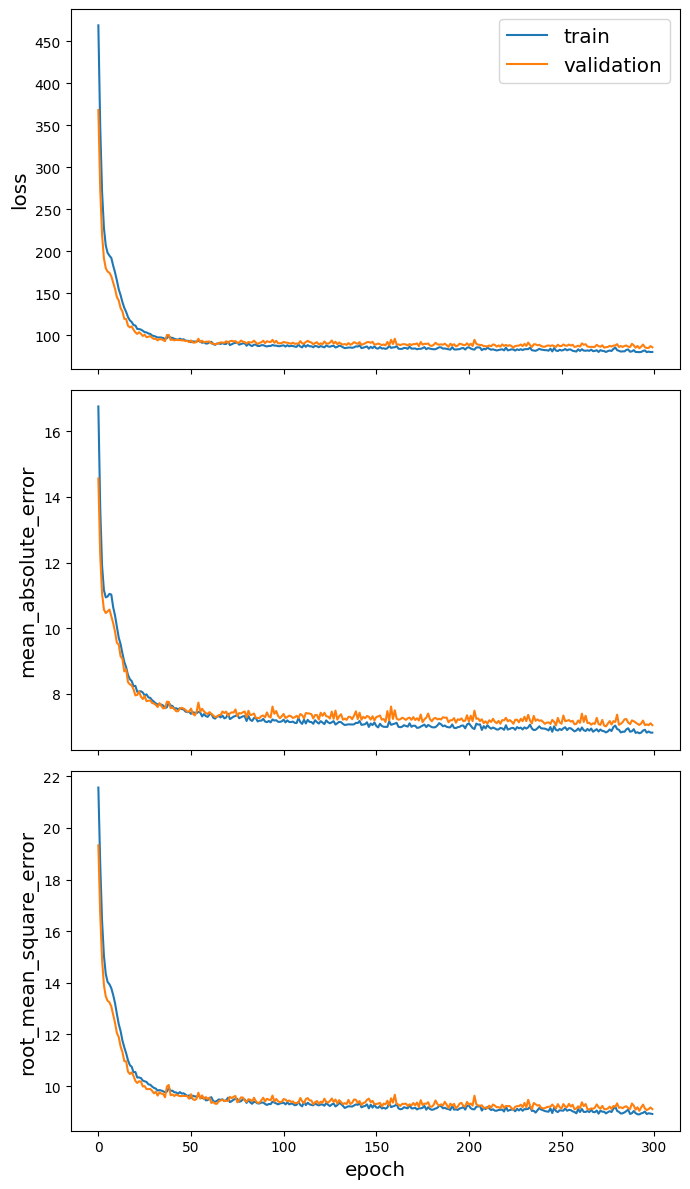

In [ ]:
sg.utils.plot_history(history)

In [ ]:
test_metrics = model.evaluate(
    test_gen, use_multiprocessing=False, workers=num_workers, verbose=1
)

print("Test Evaluation:")
for name, val in zip(model.metrics_names, test_metrics):
    print("\t{}: {:0.4f}".format(name, val))

10/10 [==============================] - 2s 82ms/step - loss: 84.9712 - root_mean_square_error: 9.0977 - mean_absolute_error: 7.0204
Test Evaluation:
	loss: 84.9712
	root_mean_square_error: 9.0977
	mean_absolute_error: 7.0204


In [ ]:
y_true = labels_test
# Predict the rankings using the model:
y_pred = model.predict(test_gen)
# Mean baseline rankings = mean movie ranking:
y_pred_baseline = np.full_like(y_pred, np.mean(y_true))

rmse = np.sqrt(mean_squared_error(y_true, y_pred_baseline))
mae = mean_absolute_error(y_true, y_pred_baseline)
print("Mean Baseline Test set metrics:")
print("\troot_mean_square_error = ", rmse)
print("\tmean_absolute_error = ", mae)

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
print("\nModel Test set metrics:")
print("\troot_mean_square_error = ", rmse)
print("\tmean_absolute_error = ", mae)

10/10 [==============================] - 3s 307ms/step
Mean Baseline Test set metrics:
	root_mean_square_error =  13.2085203874746
	mean_absolute_error =  10.649229977185849

Model Test set metrics:
	root_mean_square_error =  9.246617316604077
	mean_absolute_error =  7.0412377225057226


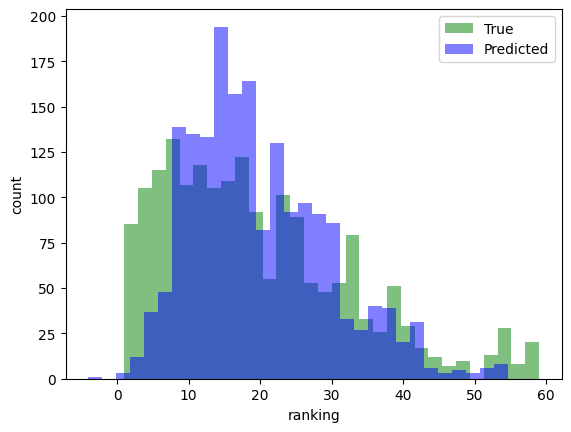

In [ ]:
h_true = plt.hist(y_true, bins=30, facecolor="green", alpha=0.5)
h_pred = plt.hist(y_pred, bins=30, facecolor="blue", alpha=0.5)
plt.xlabel("ranking")
plt.ylabel("count")
plt.legend(("True", "Predicted"))
plt.show()

In [ ]:
y_pred

array([[16.183495],
       [17.319906],
       [26.920368],
       ...,
       [19.607977],
       [18.504269],
       [37.93492 ]], dtype=float32)